# Building a Mutual Fund Portfolio

### Imports

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
%load_ext autoreload
%autoreload 2
import utils as utils

### Reading data for top Indian Mutual Funds Direct Plans

In [48]:
symbols = pd.read_csv('top_direct_mutual_funds_india_csv.csv')
symbols.head()

,Symbol,Company name,52-wk high,52-wk low,Last price,52-wk high chg.,52-wk high chg. %,52-wk low chg.,52-wk low chg. %,50-DMA,50-DMA chg.,50-DMA chg. %,200-DMA chg. %,200-DMA chg.,200-DMA
0,0P0000XVXX.BO,Aditya Birla Sun Life Corporate Bond Fund Grow...,86.68,77.09,88.32,1.64,0.019,11.23,0.1457,88.13,0.19,0.0022,0.0147,1.28,87.04
1,0P0000XVWT.BO,Aditya Birla Sun Life Government Securities Fu...,66.7,59.94,67.19,0.49,0.0073,7.25,0.121,67.29,-0.10,-0.0015,0.0119,0.79,66.40
2,0P0001BNS5.BO,Aditya Birla Sun Life Government Securities Fu...,-,-,67.19,-,-,-,-,67.29,-0.10,-0.0015,0.0119,0.79,66.40
3,0P0000XVX0.BO,Aditya Birla Sun Life Income Fund Growth Direc...,104.06,91.12,105.29,1.23,0.0118,14.17,0.1555,105.23,0.06,0.0006,0.0142,1.47,103.81
4,0P0000XVXP.BO,Aditya Birla Sun Life Regular Savings Fund Dir...,49.52,37.32,51.63,2.12,0.0427,14.31,0.3836,51.22,0.41,0.0081,0.0368,1.83,49.80


In [73]:
mf_list = symbols['Symbol']

### Fetching available parameters list 

In [74]:
data = yf.Ticker(mf_list[0]).get_info()
data

{'exchange': 'BSE',
 'shortName': 'Aditya Birla Sun Life Corporate',
 'longName': 'Aditya Birla Sun Life Corporate Bond Fund Growth Direct Plan',
 'exchangeTimezoneName': 'Asia/Kolkata',
 'exchangeTimezoneShortName': 'IST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '19800000',
 'quoteType': 'MUTUALFUND',
 'symbol': '0P0000XVXX.BO',
 'market': 'in_market',
 'annualHoldingsTurnover': 4.717,
 'enterpriseToRevenue': None,
 'beta3Year': 0.96,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': 2,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 1356998400,
 'annualReportExpenseRatio': 0.0027,
 'totalAssets': 2256856064,
 'bookValue': None,
 'fundFamily': None,
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': 0,
 'mostRecentQuarter': None,
 'enterpriseValue': None

### Fetching data for all mutual funds in the list

In [76]:
df = pd.DataFrame(index = data.keys())  
for mf in mf_list:
    data = yf.Ticker(mf).get_info()
    try:
        df[data['longName']] =  data.values()
    except ValueError:
        df[data['longName']] =  [data[ind] if ind in data.keys()  else np.nan for ind in df.index]
    time.sleep(2)

In [77]:
df.shape

(102, 83)

In [88]:
df.columns = df.loc['longName'][:]

In [89]:
df.to_csv('./mf_info_by_attributes.csv')

In [90]:
df2 = df.transpose()
df2.head()

,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,market,...,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
longName,,,,,,,,,,,,,,,,,,,,,
Aditya Birla Sun Life Corporate Bond Fund Growth Direct Plan,BSE,Aditya Birla Sun Life Corporate,Aditya Birla Sun Life Corporate Bond Fund Grow...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XVXX.BO,in_market,...,None,None,77.0866,None,False,None,None,None,88.4633,
Aditya Birla Sun Life Government Securities Fund Growth Instant Gain Direct Plan,BSE,Aditya Birla Sun Life Governmen,Aditya Birla Sun Life Government Securities Fu...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0001BNS5.BO,in_market,...,None,None,None,None,False,None,None,None,67.3372,
Aditya Birla Sun Life Income Fund Growth Direct Plan,BSE,Aditya Birla Sun Life Income Fu,Aditya Birla Sun Life Income Fund Growth Direc...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XVX0.BO,in_market,...,None,None,91.1172,None,False,None,None,None,105.451,
Aditya Birla Sun Life Regular Savings Fund Direct Plan Growth,BSE,Aditya Birla Sun Life Reg Savin,Aditya Birla Sun Life Regular Savings Fund Dir...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XVXP.BO,in_market,...,None,None,37.318,None,False,None,None,None,51.7244,
Axis Bluechip Fund Direct Plan Growth,BSE,Axis Bluechip Fund Direct Plan,Axis Bluechip Fund Direct Plan Growth,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XVTL.BO,in_market,...,None,None,25.54,None,False,None,None,None,46.92,


In [91]:
df2.to_csv('./mf_info_by_fund_name.csv')

In [92]:
df2 = df2.replace('',np.nan)
df2.isna().sum()

exchange                      0
shortName                     0
longName                      0
exchangeTimezoneName          0
exchangeTimezoneShortName     0
                             ..
dividendYield                83
bidSize                      83
dayHigh                      83
regularMarketPrice            0
logo_url                     83
Length: 102, dtype: int64

In [93]:
df2 = df2.dropna(axis =1, how = 'all')
df2.isna().sum()

exchange                       0
shortName                      0
longName                       0
exchangeTimezoneName           0
exchangeTimezoneShortName      0
isEsgPopulated                 0
gmtOffSetMilliseconds          0
quoteType                      0
symbol                         0
market                         0
annualHoldingsTurnover         0
beta3Year                     14
morningStarRiskRating          0
fundInceptionDate              0
annualReportExpenseRatio       0
totalAssets                   41
yield                          0
priceHint                      0
morningStarOverallRating       0
ytdReturn                      0
maxAge                         0
address1                       0
address2                       4
address3                       7
longBusinessSummary            0
companyOfficers                0
previousClose                  0
twoHundredDayAverage           0
averageDailyVolume10Day        4
regularMarketPreviousClose     0
fiftyDayAv

In [94]:
df2.dtypes

exchange                       object
shortName                      object
longName                       object
exchangeTimezoneName           object
exchangeTimezoneShortName      object
isEsgPopulated                   bool
gmtOffSetMilliseconds          object
quoteType                      object
symbol                         object
market                         object
annualHoldingsTurnover        float64
beta3Year                     float64
morningStarRiskRating           int64
fundInceptionDate               int64
annualReportExpenseRatio      float64
totalAssets                   float64
yield                           int64
priceHint                       int64
morningStarOverallRating        int64
ytdReturn                     float64
maxAge                          int64
address1                       object
address2                       object
address3                       object
longBusinessSummary            object
companyOfficers                object
previousClos

In [95]:
df2.to_csv('./mf_info_by_fund_name_non_empty.csv')

In [111]:
imp_columns = [column for column in df2.columns if df2.dtypes[column] not in ['object','bool']]
imp_columns

['annualHoldingsTurnover',
 'beta3Year',
 'morningStarRiskRating',
 'fundInceptionDate',
 'annualReportExpenseRatio',
 'totalAssets',
 'yield',
 'priceHint',
 'morningStarOverallRating',
 'ytdReturn',
 'maxAge',
 'previousClose',
 'twoHundredDayAverage',
 'averageDailyVolume10Day',
 'regularMarketPreviousClose',
 'fiftyDayAverage',
 'averageVolume10days',
 'averageVolume',
 'fiftyTwoWeekHigh',
 'fiftyTwoWeekLow',
 'regularMarketPrice']

In [118]:
dataset = df2[imp_columns]
dataset.dropna(axis=1, how = 'any',inplace=True)
dataset.isna().sum()

C:\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


annualHoldingsTurnover        0
morningStarRiskRating         0
fundInceptionDate             0
annualReportExpenseRatio      0
yield                         0
priceHint                     0
morningStarOverallRating      0
ytdReturn                     0
maxAge                        0
previousClose                 0
twoHundredDayAverage          0
regularMarketPreviousClose    0
fiftyDayAverage               0
regularMarketPrice            0
dtype: int64

In [141]:
dataset.head()

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice,labels
longName,,,,,,,,,,,,,,,
Aditya Birla Sun Life Corporate Bond Fund Growth Direct Plan,4.7170,2,1356998400,0.0027,0,2,5,0.0214,1,88.3965,87.059810,88.3965,88.137610,88.4633,0
Aditya Birla Sun Life Government Securities Fund Growth Instant Gain Direct Plan,13.1504,4,1356998400,0.0057,0,2,5,0.0109,1,67.2629,66.406610,67.2629,67.291080,67.3372,0
Aditya Birla Sun Life Income Fund Growth Direct Plan,19.5812,4,1356998400,0.0080,0,2,5,0.0153,1,105.3140,103.827965,105.3140,105.234116,105.4510,0
Aditya Birla Sun Life Regular Savings Fund Direct Plan Growth,3.9256,5,1356998400,0.0094,0,2,5,0.0897,1,51.7211,49.831160,51.7211,51.233757,51.7244,0
Axis Bluechip Fund Direct Plan Growth,1.4238,2,1356998400,0.0090,0,2,5,0.1098,1,46.8800,43.855408,46.8800,46.184570,46.9200,0


### Finding optimum Number of Clusters for selecting best Performing Mutual Funds

In [119]:
mms = MinMaxScaler()
mms.fit(dataset)
data_transformed = mms.transform(dataset)

In [120]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

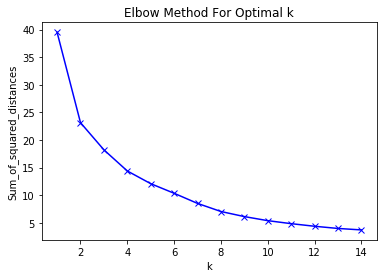

In [121]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [123]:
km = KMeans(n_clusters=4)
kmn = km.fit(data_transformed)
dataset['labels'] = kmn.labels_

C:\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
dataset.groupby(by = 'labels').mean()

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice
labels,,,,,,,,,,,,,,
0,4.511651,2.886792,1.365272e+09,0.007083,0.0,2.0,4.773585,0.040755,1.0,44.817543,44.120974,44.817543,45.550191,44.838694
1,8.682180,1.200000,1.356998e+09,0.001860,0.0,2.0,3.000000,0.017180,1.0,2632.518000,2609.017600,2632.518000,2629.476180,2632.920000
2,0.769635,3.217391,1.362892e+09,0.015822,0.0,2.0,4.391304,0.222365,1.0,101.498096,101.601578,101.498096,115.741806,101.558661
3,2.678700,0.000000,1.488715e+09,0.009800,0.0,2.0,0.000000,0.131800,1.0,17.413250,16.261488,17.413250,17.177397,17.397850


In [130]:
dataset.groupby(by = 'labels').count()

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice
labels,,,,,,,,,,,,,,
0,53,53,53,53,53,53,53,53,53,53,53,53,53,53
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,23,23,23,23,23,23,23,23,23,23,23,23,23,23
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2


### Selecting the cluster with best ytdReturn value

In [131]:
dataset2 = dataset[dataset['labels'] == 2]

In [142]:
dataset2.head()

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice,labels
longName,,,,,,,,,,,,,,,
Axis Long Term Equity Fund Direct Plan Growth Option,1.1029,2,1356998400,0.0110,0,2,5,0.1475,1,74.2924,68.347435,74.2924,72.721130,74.3636,0
Axis Midcap Fund Direct Plan Growth,0.6369,1,1356998400,0.0116,0,2,5,0.2596,1,69.7100,61.509853,69.7100,67.108000,69.7000,3
BOI AXA Tax Advantage Fund-Direct Plan- Growth,0.8033,5,1356998400,0.0181,0,2,4,0.2867,1,104.3800,90.439330,104.3800,99.555145,104.8400,0
Canara Robeco Bluechip Equity Fund Direct Plan Growth,0.9430,3,1356998400,0.0172,0,2,5,0.1580,1,42.2500,39.154816,42.2500,41.460570,42.2600,0
Canara Robeco Emerging Equities-Direct Plan-Growth Option,0.8596,5,1356998400,0.0093,0,2,5,0.2401,1,162.7100,145.034300,162.7100,157.368850,163.4400,0


In [132]:
mms = MinMaxScaler()
mms.fit(dataset2)
data_transformed2 = mms.transform(dataset2)

In [133]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed2)
    Sum_of_squared_distances.append(km.inertia_)

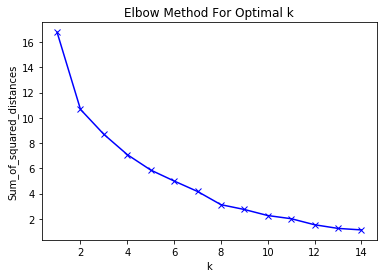

In [134]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [135]:
km = KMeans(n_clusters=7)
kmn = km.fit(data_transformed2)
dataset2['labels'] = kmn.labels_

C:\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
dataset2.groupby(by = 'labels').mean()

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice
labels,,,,,,,,,,,,,,
0,0.853569,3.846154,1.356998e+09,0.011346,0.0,2.0,4.692308,0.200615,1.0,79.942523,80.214486,79.942523,98.535919,80.156138
1,0.251450,3.500000,1.356998e+09,0.015300,0.0,2.0,3.000000,0.162750,1.0,221.286500,240.334870,221.286500,263.493705,221.028500
2,0.410500,4.000000,1.356998e+09,0.063900,0.0,2.0,4.000000,0.360700,1.0,205.187000,176.577130,205.187000,205.624200,204.580000
3,0.362200,1.000000,1.360087e+09,0.017775,0.0,2.0,4.750000,0.258625,1.0,52.297850,46.652558,52.297850,51.381806,52.297100
4,3.188300,3.000000,1.385942e+09,0.016600,0.0,2.0,2.000000,0.282800,1.0,39.440000,35.204224,39.440000,39.692940,39.360000
5,0.464700,3.000000,1.356998e+09,0.034200,0.0,2.0,4.000000,0.327400,1.0,368.612000,326.232100,368.612000,372.950780,368.529000
6,0.590000,3.000000,1.451261e+09,0.000000,0.0,2.0,5.000000,0.175500,1.0,30.200000,88.754560,30.200000,30.312030,30.105000


In [138]:
dataset2.groupby(by = 'labels').count()

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice
labels,,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [153]:
dataset3 = dataset2[dataset2['labels'] == 5]
dataset3

,annualHoldingsTurnover,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,yield,priceHint,morningStarOverallRating,ytdReturn,maxAge,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,regularMarketPrice,labels
longName,,,,,,,,,,,,,,,
Quant Active Fund Growth Option Direct Plan,0.4647,3,1356998400,0.0342,0,2,4,0.3274,1,368.612,326.2321,368.612,372.95078,368.529,5


In [157]:
mutual_funds = list(dataset2.index)
mutual_funds

['Axis Long Term Equity Fund Direct Plan Growth Option',
 'Axis Midcap Fund Direct Plan Growth',
 'BOI AXA Tax Advantage Fund-Direct Plan- Growth',
 'Canara Robeco Bluechip Equity Fund Direct Plan Growth',
 'Canara Robeco Emerging Equities-Direct Plan-Growth Option',
 'Canara Robeco Equity Taxsaver - Direct Plan - Growth Option',
 'DSP Tax Saver Fund - Direct Plan - Growth',
 'Franklin Build India Fund - Direct - Growth',
 'HDFC Balanced Adv Direct Plan Growth Option',
 'ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth',
 'IDFC Tax Advantage (ELSS) Fund - Direct Plan - Growth',
 'Invesco India Contra Fund - Direct Plan - Growth',
 'Invesco India Infrastructure Fund - Direct Pan - Growth Option',
 'Kotak Emerging Equity Scheme Direct Growth',
 'Mirae Asset Emerging Bluechip Fund - Direct Plan - Growth',
 'Mirae Asset Tax Saver Fund -Direct Plan-Growth',
 'Nippon India Large Cap Fund - Direct Plan - Growth Plan',
 'Parag Parikh Long Term Equity Direct Growth',
 'PGIM India Mi

In [163]:
symbols_by_name = {}
for ind in symbols.index:
    symbols_by_name[symbols.loc[ind]['Company name']] = symbols.loc[ind]['Symbol']

In [177]:
symbols_list = [str(symbols_by_name[key]) for key in mutual_funds]
symbols_list

['0P0000XVU7.BO',
 '0P0000XVUH.BO',
 '0P0000XVZR.BO',
 '0P0000XW0O.BO',
 '0P0000XW00.BO',
 '0P0000XW04.BO',
 '0P0000XW2T.BO',
 '0P0000XW55.BO',
 '0P0001EI12.BO',
 '0P0000XUYS.BO',
 '0P0000XV1I.BO',
 '0P0000XVGR.BO',
 '0P0000XVH6.BO',
 '0P0000XV5R.BO',
 '0P0000XV9V.BO',
 '0P00017844.BO',
 '0P0000XVG6.BO',
 '0P0000YWL1.BO',
 '0P00011MAT.BO',
 '0P0000XW4A.BO',
 '0P0000XW4E.BO',
 '0P0000XW51.BO',
 '0P0000XW1B.BO']

In [3]:
symbols_list = ['0P0000XVU7.BO',
 '0P0000XVUH.BO',
 '0P0000XVZR.BO',
 '0P0000XW0O.BO',
 '0P0000XW00.BO',
 '0P0000XW04.BO',
 '0P0000XW2T.BO',
 '0P0000XW55.BO',
 '0P0001EI12.BO',
 '0P0000XUYS.BO',
 '0P0000XV1I.BO',
 '0P0000XVGR.BO',
 '0P0000XVH6.BO',
 '0P0000XV5R.BO',
 '0P0000XV9V.BO',
 '0P00017844.BO',
 '0P0000XVG6.BO',
 '0P0000YWL1.BO',
 '0P00011MAT.BO',
 '0P0000XW4A.BO',
 '0P0000XW4E.BO',
 '0P0000XW51.BO',
 '0P0000XW1B.BO']

In [13]:
columns = ['Axis Long Term Equity Fund Direct Plan Growth Option',
 'Axis Midcap Fund Direct Plan Growth',
 'BOI AXA Tax Advantage Fund-Direct Plan- Growth',
 'Canara Robeco Bluechip Equity Fund Direct Plan Growth',
 'Canara Robeco Emerging Equities-Direct Plan-Growth Option',
 'Canara Robeco Equity Taxsaver - Direct Plan - Growth Option',
 'DSP Tax Saver Fund - Direct Plan - Growth',
 'Franklin Build India Fund - Direct - Growth',
 'HDFC Balanced Adv Direct Plan Growth Option',
 'ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth',
 'IDFC Tax Advantage (ELSS) Fund - Direct Plan - Growth',
 'Invesco India Contra Fund - Direct Plan - Growth',
 'Invesco India Infrastructure Fund - Direct Pan - Growth Option',
 'Kotak Emerging Equity Scheme Direct Growth',
 'Mirae Asset Emerging Bluechip Fund - Direct Plan - Growth',
 'Mirae Asset Tax Saver Fund -Direct Plan-Growth',
 'Nippon India Large Cap Fund - Direct Plan - Growth Plan',
 'Parag Parikh Long Term Equity Direct Growth',
 'PGIM India Midcap Opportunities Fund Direct Growth',
 'Quant Absolute Fund Growth Option Direct Plan',
 'Quant Active Fund Growth Option Direct Plan',
 'Quant Tax Plan Growth Option Direct Plan',
 'SBI Small Cap Fund Direct Plan Growth']

### Reading NAV data for all mutual funds in the cluster

In [14]:
# mf = utils.stock_data(symbols_list, '5y', '1d')
# mf = mf['Close']
mf = pd.read_csv('mutual_funds_nav.csv',index_col ='Date')
mf.columns = columns
mf.head()

,Axis Long Term Equity Fund Direct Plan Growth Option,Axis Midcap Fund Direct Plan Growth,BOI AXA Tax Advantage Fund-Direct Plan- Growth,Canara Robeco Bluechip Equity Fund Direct Plan Growth,Canara Robeco Emerging Equities-Direct Plan-Growth Option,Canara Robeco Equity Taxsaver - Direct Plan - Growth Option,DSP Tax Saver Fund - Direct Plan - Growth,Franklin Build India Fund - Direct - Growth,HDFC Balanced Adv Direct Plan Growth Option,ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth,...,Kotak Emerging Equity Scheme Direct Growth,Mirae Asset Emerging Bluechip Fund - Direct Plan - Growth,Mirae Asset Tax Saver Fund -Direct Plan-Growth,Nippon India Large Cap Fund - Direct Plan - Growth Plan,Parag Parikh Long Term Equity Direct Growth,PGIM India Midcap Opportunities Fund Direct Growth,Quant Absolute Fund Growth Option Direct Plan,Quant Active Fund Growth Option Direct Plan,Quant Tax Plan Growth Option Direct Plan,SBI Small Cap Fund Direct Plan Growth
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,27.8811,62.562500,44.398998,55.367001,34.626202,50.919998,21.030001,44.045300,36.490002,62.060001,...,66.195297,49.997002,133.875000,181.500000,95.801300,46.522598,24.002199,21.570000,17.420000,199.104996
2018-01-02,27.7915,62.551800,44.083000,55.073002,34.530201,50.740002,20.879999,43.851101,36.200001,61.990002,...,65.591499,49.740002,133.753998,180.533997,95.160301,46.334202,23.886700,21.459999,17.382000,198.425003
2018-01-03,27.9450,62.855900,44.240002,55.284000,34.633301,50.750000,20.910000,43.923698,36.400002,62.560001,...,67.062698,49.820000,134.772003,181.759995,95.611198,46.374298,23.962400,21.500000,17.417000,199.212006
2018-01-04,28.2318,63.563900,44.637001,55.764999,34.960899,51.009998,21.010000,44.107201,36.439999,62.900002,...,67.802299,50.280998,135.632996,183.046005,96.350800,46.610298,24.069201,21.639999,17.559000,200.908005
2018-01-05,28.5791,63.984699,45.097000,56.495998,35.202599,51.349998,21.080000,44.654400,36.820000,63.700001,...,68.868401,50.716000,136.889008,184.787003,97.320396,46.916500,24.260201,21.730000,17.709999,201.248993


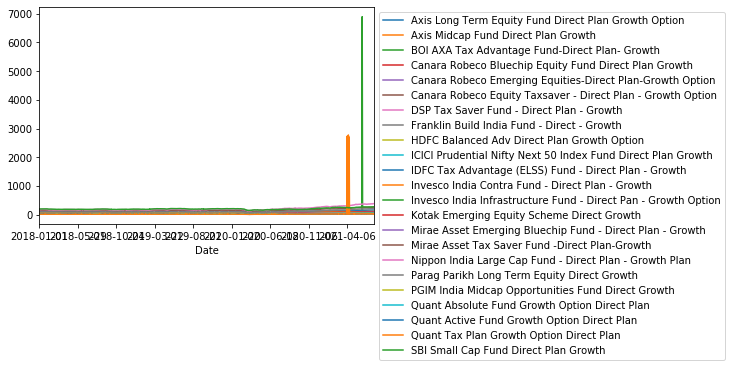

In [18]:
mf.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


### Treating outliers

In [19]:
mf[mf>1000] = np.nan

In [20]:
mf.fillna(method = 'bfill')

,Axis Long Term Equity Fund Direct Plan Growth Option,Axis Midcap Fund Direct Plan Growth,BOI AXA Tax Advantage Fund-Direct Plan- Growth,Canara Robeco Bluechip Equity Fund Direct Plan Growth,Canara Robeco Emerging Equities-Direct Plan-Growth Option,Canara Robeco Equity Taxsaver - Direct Plan - Growth Option,DSP Tax Saver Fund - Direct Plan - Growth,Franklin Build India Fund - Direct - Growth,HDFC Balanced Adv Direct Plan Growth Option,ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth,...,Kotak Emerging Equity Scheme Direct Growth,Mirae Asset Emerging Bluechip Fund - Direct Plan - Growth,Mirae Asset Tax Saver Fund -Direct Plan-Growth,Nippon India Large Cap Fund - Direct Plan - Growth Plan,Parag Parikh Long Term Equity Direct Growth,PGIM India Midcap Opportunities Fund Direct Growth,Quant Absolute Fund Growth Option Direct Plan,Quant Active Fund Growth Option Direct Plan,Quant Tax Plan Growth Option Direct Plan,SBI Small Cap Fund Direct Plan Growth
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,27.881100,62.562500,44.398998,55.367001,34.626202,50.919998,21.030001,44.045300,36.490002,62.060001,...,66.195297,49.997002,133.875000,181.500000,95.801300,46.522598,24.002199,21.570000,17.420000,199.104996
2018-01-02,27.791500,62.551800,44.083000,55.073002,34.530201,50.740002,20.879999,43.851101,36.200001,61.990002,...,65.591499,49.740002,133.753998,180.533997,95.160301,46.334202,23.886700,21.459999,17.382000,198.425003
2018-01-03,27.945000,62.855900,44.240002,55.284000,34.633301,50.750000,20.910000,43.923698,36.400002,62.560001,...,67.062698,49.820000,134.772003,181.759995,95.611198,46.374298,23.962400,21.500000,17.417000,199.212006
2018-01-04,28.231800,63.563900,44.637001,55.764999,34.960899,51.009998,21.010000,44.107201,36.439999,62.900002,...,67.802299,50.280998,135.632996,183.046005,96.350800,46.610298,24.069201,21.639999,17.559000,200.908005
2018-01-05,28.579100,63.984699,45.097000,56.495998,35.202599,51.349998,21.080000,44.654400,36.820000,63.700001,...,68.868401,50.716000,136.889008,184.787003,97.320396,46.916500,24.260201,21.730000,17.709999,201.248993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-12,35.522499,95.250000,72.892998,95.946999,47.757500,78.680000,31.459999,74.047401,68.720001,102.989998,...,104.104103,80.111000,259.979706,380.725586,212.159698,64.274101,46.292702,40.860001,30.705000,272.807007
2021-07-13,35.452999,95.809998,73.059998,96.516998,48.158501,79.209999,31.580000,74.043800,68.919998,103.169998,...,104.674599,80.757004,260.829498,382.229614,212.574600,64.920403,47.001701,40.889999,30.922001,274.566010
2021-07-14,35.452900,95.989998,73.157997,96.920998,48.307098,79.459999,31.660000,74.218002,69.489998,103.889999,...,105.256401,81.077003,261.813385,384.307312,213.014893,64.866302,47.462700,41.180000,31.110001,275.490997


### Plotting NAV Values

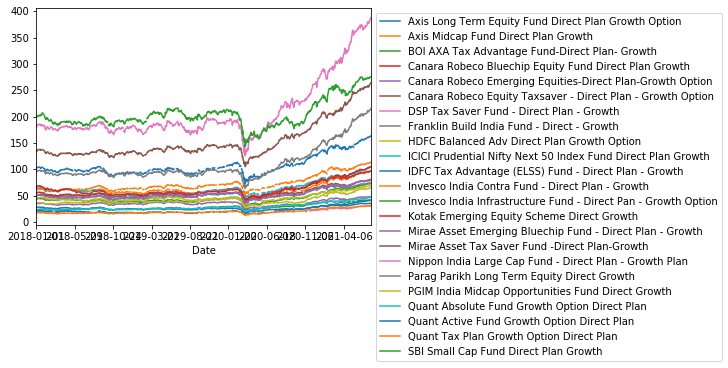

In [21]:
mf.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [36]:
r,mr,ar,av = utils.all_returns(mf,'monthly')

### Plotting returns series 

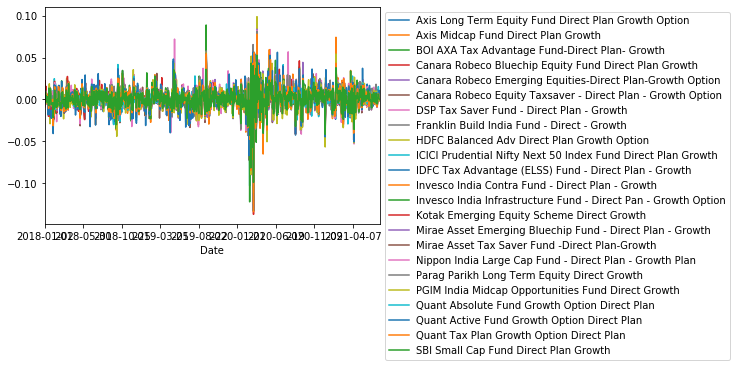

In [37]:
r.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Annualized Returns

In [39]:
ar 

Axis Long Term Equity Fund Direct Plan Growth Option              0.074551
Axis Midcap Fund Direct Plan Growth                               0.135108
BOI AXA Tax Advantage Fund-Direct Plan- Growth                    0.156245
Canara Robeco Bluechip Equity Fund Direct Plan Growth             0.177758
Canara Robeco Emerging Equities-Direct Plan-Growth Option         0.102921
Canara Robeco Equity Taxsaver - Direct Plan - Growth Option       0.140301
DSP Tax Saver Fund - Direct Plan - Growth                         0.130622
Franklin Build India Fund - Direct - Growth                       0.163818
HDFC Balanced Adv Direct Plan Growth Option                       0.206175
ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth      0.164016
IDFC Tax Advantage (ELSS) Fund - Direct Plan - Growth             0.143577
Invesco India Contra Fund - Direct Plan - Growth                  0.195345
Invesco India Infrastructure Fund - Direct Pan - Growth Option    0.184117
Kotak Emerging Equity Sch

### Annualized Volatility

In [40]:
av

Axis Long Term Equity Fund Direct Plan Growth Option              0.197104
Axis Midcap Fund Direct Plan Growth                               0.196743
BOI AXA Tax Advantage Fund-Direct Plan- Growth                    0.178750
Canara Robeco Bluechip Equity Fund Direct Plan Growth             0.201479
Canara Robeco Emerging Equities-Direct Plan-Growth Option         0.213756
Canara Robeco Equity Taxsaver - Direct Plan - Growth Option       0.204972
DSP Tax Saver Fund - Direct Plan - Growth                         0.195101
Franklin Build India Fund - Direct - Growth                       0.190461
HDFC Balanced Adv Direct Plan Growth Option                       0.169321
ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth      0.196144
IDFC Tax Advantage (ELSS) Fund - Direct Plan - Growth             0.196209
Invesco India Contra Fund - Direct Plan - Growth                  0.192272
Invesco India Infrastructure Fund - Direct Pan - Growth Option    0.190654
Kotak Emerging Equity Sch

### Sharp Ratios

In [43]:
utils.sharp_ratio(ar,av,0.03).sort_values(ascending=False)                                               

Quant Absolute Fund Growth Option Direct Plan                     1.350186
Mirae Asset Tax Saver Fund -Direct Plan-Growth                    1.198425
Parag Parikh Long Term Equity Direct Growth                       1.153176
Nippon India Large Cap Fund - Direct Plan - Growth Plan           1.080075
HDFC Balanced Adv Direct Plan Growth Option                       1.040475
Quant Active Fund Growth Option Direct Plan                       0.879709
Invesco India Contra Fund - Direct Plan - Growth                  0.859954
Invesco India Infrastructure Fund - Direct Pan - Growth Option    0.808356
Quant Tax Plan Growth Option Direct Plan                          0.751708
Canara Robeco Bluechip Equity Fund Direct Plan Growth             0.733365
BOI AXA Tax Advantage Fund-Direct Plan- Growth                    0.706263
Franklin Build India Fund - Direct - Growth                       0.702601
ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth      0.683252
Kotak Emerging Equity Sch

In [45]:
drawdowns = pd.DataFrame()
wealth = pd.DataFrame()
prev_peak = pd.DataFrame()
for column in mf.columns:
    dr = utils.drawdown(r[column])
    drawdowns[column] = dr['Drawdown']
    wealth[column] = dr['Wealth']
    prev_peak[column] = dr["Previous Peak"]

### Plotting Drawdowns (Max drop from previous peak values)

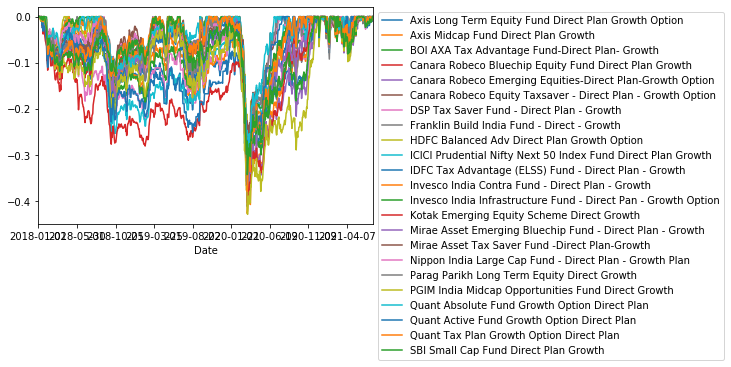

In [46]:
drawdowns.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Plottimg Wealth Index

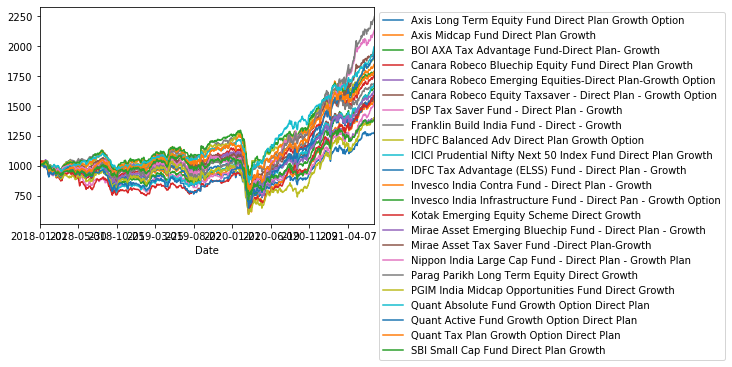

In [47]:
wealth.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

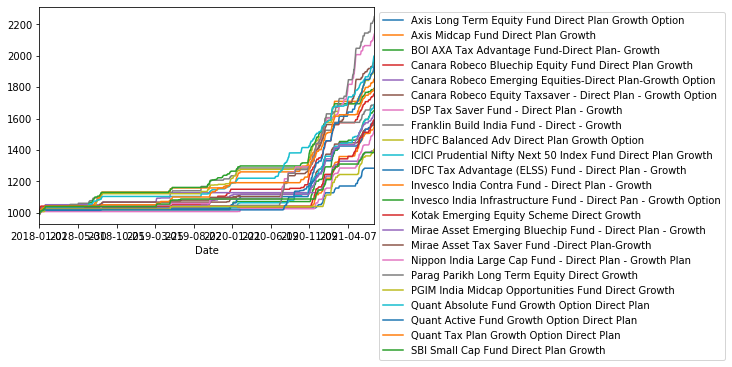

In [48]:
prev_peak.plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Building Portfolios

### Comparing Max Sharp ratio (MSR), Equally weighted (EW) and Global minimum variance (GMV) Strategies for Portfolio construction

In [51]:
er = ar
cov = r.cov()

In [53]:
ew = np.repeat(1/len(mf.columns), len(mf.columns))
pr = utils.portfolio_return(ew, ar)
pr

0.16587883265274242

In [54]:
pv = utils.portfolio_vol(ew,cov)
pv

0.010589367032025504

[0.00000000e+00 0.00000000e+00 1.18856092e-12 0.00000000e+00
 0.00000000e+00 2.64501036e-12 9.87327942e-02 0.00000000e+00
 1.15796540e-01 2.35894070e-12 0.00000000e+00 2.89600529e-12
 6.74492237e-02 9.98522249e-12 0.00000000e+00 1.82742157e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.35279285e-01
 7.95023255e-12 0.00000000e+00 3.29631969e-12]


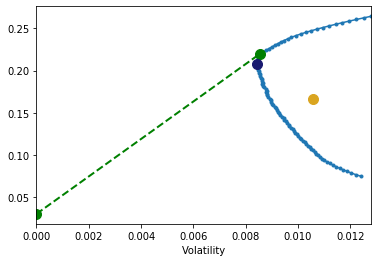

In [74]:
msr,ew,gmv = utils.plot_ef(100, er, cov, show_cml=True, riskfree_rate=0.03, show_ew=True, show_gmv=True)


In [75]:
msr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.17198266e-12, 0.00000000e+00,
       7.88946502e-02, 0.00000000e+00, 0.00000000e+00, 9.82785351e-13,
       2.88127625e-12, 0.00000000e+00, 0.00000000e+00, 2.67620286e-01,
       1.97571334e-12, 0.00000000e+00, 0.00000000e+00, 6.53485064e-01,
       2.57056427e-12, 0.00000000e+00, 0.00000000e+00])

In [76]:
ew

array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826])

In [77]:
gmv

array([0.00000000e+00, 0.00000000e+00, 1.18856092e-12, 0.00000000e+00,
       0.00000000e+00, 2.64501036e-12, 9.87327942e-02, 0.00000000e+00,
       1.15796540e-01, 2.35894070e-12, 0.00000000e+00, 2.89600529e-12,
       6.74492237e-02, 9.98522249e-12, 0.00000000e+00, 1.82742157e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.35279285e-01,
       7.95023255e-12, 0.00000000e+00, 3.29631969e-12])

In [81]:
pr = [utils.portfolio_return(msr,ar),utils.portfolio_return(ew,ar),utils.portfolio_return(gmv,ar)]
pr

[0.21958285342839978, 0.16587883265274242, 0.20779814119233275]

In [82]:
pv = [utils.portfolio_vol(msr,cov)*(252**0.5),utils.portfolio_vol(ew,cov)*(252**0.5),utils.portfolio_vol(gmv,cov)*(252**0.5)]
pv

[0.13549712580112136, 0.16810099024995379, 0.1336703874867783]

In [83]:
sr = [utils.sharp_ratio(pr[0],pv[0],0.03),utils.sharp_ratio(pr[1],pv[1],0.03),utils.sharp_ratio(pr[2],pv[2],0.03)]
sr

[1.3991651284667384, 0.8083166699416857, 1.330123631233726]

### Computing Optimum weights 

In [88]:
weights = pd.DataFrame(index = mf.columns)
weights['msr'] = msr
weights['ew'] = ew
weights['gmv'] = gmv
weights = weights.round({'msr':3,'ew':3,'gmv':3})
weights

,msr,ew,gmv
Axis Long Term Equity Fund Direct Plan Growth Option,0.000,0.043,0.000
Axis Midcap Fund Direct Plan Growth,0.000,0.043,0.000
BOI AXA Tax Advantage Fund-Direct Plan- Growth,0.000,0.043,0.000
Canara Robeco Bluechip Equity Fund Direct Plan Growth,0.000,0.043,0.000
Canara Robeco Emerging Equities-Direct Plan-Growth Option,0.000,0.043,0.000
Canara Robeco Equity Taxsaver - Direct Plan - Growth Option,0.000,0.043,0.000
DSP Tax Saver Fund - Direct Plan - Growth,0.000,0.043,0.099
Franklin Build India Fund - Direct - Growth,0.000,0.043,0.000
HDFC Balanced Adv Direct Plan Growth Option,0.079,0.043,0.116
ICICI Prudential Nifty Next 50 Index Fund Direct Plan Growth,0.000,0.043,0.000
